# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Explore the EEG Data

In [2]:
df = pd.read_csv('EEG-HAR_Subject_4_Merged.csv')
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns:
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used 1', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used 2', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)', 'Activity', 'Timestamp_Gyro', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label_x', 'Subject_ID_x', 'Timestamp_Accel', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)', 'Activity_Label_y', 'Subject_ID_y']

First 5 rows:
   Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  \
0           6.0 -187500.022352  -61496.645093   -361

# Count the Activity Labels

In [3]:
df = pd.read_csv('EEG-HAR_Subject_4_Merged.csv')
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
OpenBCISession_s4-seated boxing hooks            63238
OpenBCISession_s4-seated side bends              58646
OpenBCISession_s4-seated medicine ball twists    58427
OpenBCISession_s4-standing heel to toe walk      58298
OpenBCISession_s4-wall push-ups                  58113
OpenBCISession_s4-seated leg extensions          57688
OpenBCISession_s4-light stationary cycling       57378
OpenBCISession_s4-chair squats                   54674
OpenBCISession_s4-marching in place              38639
OpenBCISession_s4-side-stepping                  38568
Name: count, dtype: int64


# Extract EEG Data and Save to New File

In [4]:
df = pd.read_csv('EEG-HAR_Subject_4_Merged.csv')
eeg_columns = [f'EXG Channel {i}' for i in range(16)]
meta_columns = ['Subject_ID_x', 'Activity']
eeg_only_df = df[eeg_columns + meta_columns]
eeg_only_df.to_csv('EEG_Only_Subject4.csv', index=False)
print("Created: EEG_Only_Subject4.csv")
print(f"Shape: {eeg_only_df.shape}")
print(eeg_only_df.head())

Created: EEG_Only_Subject4.csv
Shape: (543669, 18)
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352  -61496.645093   -3612.600698 -187500.022352 -177651.039082   
1 -187500.022352  -62571.205207   -3609.382046 -187500.022352 -177513.844074   
2 -187500.022352  -63922.077587   -3597.177994 -187500.022352 -177373.676285   
3 -187500.022352  -65122.388616   -3572.792241 -187500.022352 -177356.197221   
4 -187500.022352  -66104.412509   -3607.951535 -187500.022352 -177420.726707   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0   -6056.383974  -19431.489042 -187500.022352  -28378.378258  -18562.766142   
1   -6162.979443  -19418.077996 -187500.022352  -28387.944804  -18595.511448   
2   -6238.394229  -19403.839934 -187500.022352  -28359.200461  -18582.033346   
3   -6116.800739  -19394.519257 -187500.022352  -28366.330667  -18530.892555   
4   -5992.413281  -19427.264563 -187500.022352  -28374.354944  -1843

# Rename Columns and Save the Updated File

In [5]:
df = pd.read_csv('EEG_Only_Subject4.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df.to_csv('EEG_Only_Subject4.csv', index=False)
print("Columns renamed and file updated.")
print("Last 2 columns:", df.columns[-2:].tolist())
print("\nPreview of data:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns renamed and file updated.
Last 2 columns: ['Subject_ID', 'Activity_Label_OpenBCI']

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352  -61496.645093   -3612.600698 -187500.022352 -177651.039082   
1 -187500.022352  -62571.205207   -3609.382046 -187500.022352 -177513.844074   
2 -187500.022352  -63922.077587   -3597.177994 -187500.022352 -177373.676285   
3 -187500.022352  -65122.388616   -3572.792241 -187500.022352 -177356.197221   
4 -187500.022352  -66104.412509   -3607.951535 -187500.022352 -177420.726707   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0   -6056.383974  -19431.489042 -187500.022352  -28378.378258  -18562.766142   
1   -6162.979443  -19418.077996 -187500.022352  -28387.944804  -18595.511448   
2   -6238.394229  -19403.839934 -187500.022352  -28359.200461  -18582.033346   
3   -6116.800739  -19394.519257 -187500.022352  -28366.330667  -18530.892555   
4   -5992.

# Display Unique Activity Labels

In [6]:
print(df['Activity_Label_OpenBCI'].unique())

['OpenBCISession_s4-seated leg extensions'
 'OpenBCISession_s4-marching in place' 'OpenBCISession_s4-wall push-ups'
 'OpenBCISession_s4-seated boxing hooks'
 'OpenBCISession_s4-standing heel to toe walk'
 'OpenBCISession_s4-side-stepping' 'OpenBCISession_s4-seated side bends'
 'OpenBCISession_s4-seated medicine ball twists'
 'OpenBCISession_s4-chair squats'
 'OpenBCISession_s4-light stationary cycling']


# Count Rows per Activity Label

In [7]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print("Number of rows per activity label:\n")
print(activity_counts)

Number of rows per activity label:

Activity_Label_OpenBCI
OpenBCISession_s4-seated boxing hooks            63238
OpenBCISession_s4-seated side bends              58646
OpenBCISession_s4-seated medicine ball twists    58427
OpenBCISession_s4-standing heel to toe walk      58298
OpenBCISession_s4-wall push-ups                  58113
OpenBCISession_s4-seated leg extensions          57688
OpenBCISession_s4-light stationary cycling       57378
OpenBCISession_s4-chair squats                   54674
OpenBCISession_s4-marching in place              38639
OpenBCISession_s4-side-stepping                  38568
Name: count, dtype: int64


# Plot Activity Counts

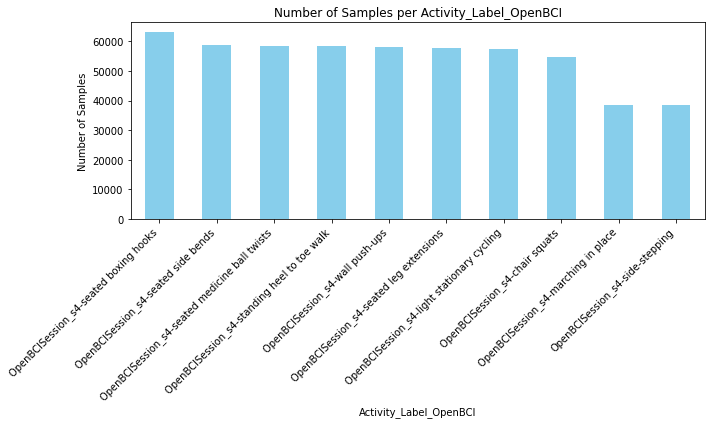

In [8]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Activity_Label_OpenBCI')
plt.xlabel('Activity_Label_OpenBCI')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Update Activity Labels and Save File

In [9]:
df = pd.read_csv('EEG_Only_Subject4.csv')

df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})

df['Subject_ID'] = df['Subject_ID'].replace('Subject 4', 4).astype(int)

activity_mapping = {
    'OpenBCISession_s4-seated leg extensions': 'Seated Leg Extensions',
    'OpenBCISession_s4-marching in place': 'Marching in Place',
    'OpenBCISession_s4-wall push-ups': 'Wall Push-ups',
    'OpenBCISession_s4-seated boxing hooks': 'Seated Boxing Hooks',
    'OpenBCISession_s4-standing heel to toe walk': 'Standing Heel-to-Toe Walk',
    'OpenBCISession_s4-side-stepping': 'Side-Stepping',
    'OpenBCISession_s4-seated side bends': 'Seated Side Bends',
    'OpenBCISession_s4-seated medicine ball twists': 'Seated Medicine Ball Twists',
    'OpenBCISession_s4-chair squats': 'Chair Squats',
    'OpenBCISession_s4-light stationary cycling': 'Light Stationary Cycling'
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping)

df.to_csv('EEG_Only_Subject4.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now:")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931207/264127581.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subject_ID'] = df['Subject_ID'].replace('Subject 4', 4).astype(int)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now:
['Seated Leg Extensions' 'Marching in Place' 'Wall Push-ups'
 'Seated Boxing Hooks' 'Standing Heel-to-Toe Walk' 'Side-Stepping'
 'Seated Side Bends' 'Seated Medicine Ball Twists' 'Chair Squats'
 'Light Stationary Cycling']

Final shape: 543669 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352  -61496.645093   -3612.600698 -187500.022352 -177651.039082   
1 -187500.022352  -62571.205207   -3609.382046 -187500.022352 -177513.844074   
2 -187500.022352  -63922.077587   -3597.177994 -187500.022352 -177373.676285   
3 -187500.022352  -65122.388616   -3572.792241 -187500.022352 -177356.197221   
4 -187500.022352  -66104.412509   -3607.951535 -187500.022352 -177420.726707   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0   -6056.383974  -19431.489042 -187500.022352  -28378.378258  -18562.76614

# Count the Activity Labels in Updated Data

In [10]:
df = pd.read_csv('EEG_Only_Subject4.csv')
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print(activity_counts)

Activity_Label_OpenBCI
Seated Boxing Hooks            63238
Seated Side Bends              58646
Seated Medicine Ball Twists    58427
Standing Heel-to-Toe Walk      58298
Wall Push-ups                  58113
Seated Leg Extensions          57688
Light Stationary Cycling       57378
Chair Squats                   54674
Marching in Place              38639
Side-Stepping                  38568
Name: count, dtype: int64


# Map Activity Labels to Numeric Values and Save File

In [11]:
df = pd.read_csv('EEG_Only_Subject4.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df['Subject_ID'] = df['Subject_ID'].replace('Subject 4', 4).astype(int)
activity_mapping_to_numeric = {
    'Seated Leg Extensions': 1,
    'Marching in Place': 2,
    'Wall Push-ups': 3,
    'Seated Boxing Hooks': 4,
    'Standing Heel-to-Toe Walk': 5,
    'Side-Stepping': 6,
    'Seated Side Bends': 7,
    'Seated Medicine Ball Twists': 8,
    'Chair Squats': 9,
    'Light Stationary Cycling': 10
}
df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)
df.to_csv('EEG_Only_Subject4_Updated.csv', index=False)
print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now (numeric):")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931207/871478787.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now (numeric):
[ 1  2  3  4  5  6  7  8  9 10]

Final shape: 543669 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352  -61496.645093   -3612.600698 -187500.022352 -177651.039082   
1 -187500.022352  -62571.205207   -3609.382046 -187500.022352 -177513.844074   
2 -187500.022352  -63922.077587   -3597.177994 -187500.022352 -177373.676285   
3 -187500.022352  -65122.388616   -3572.792241 -187500.022352 -177356.197221   
4 -187500.022352  -66104.412509   -3607.951535 -187500.022352 -177420.726707   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0   -6056.383974  -19431.489042 -187500.022352  -28378.378258  -18562.766142   
1   -6162.979443  -19418.077996 -187500.022352  -28387.944804  -18595.511448   
2   -6238.394229  -19403.839934 -187500.022352  -28359.200461  -18582.033346   
3   -6116.800739

# Count and Sort Activity Labels (Numeric)

In [12]:
df = pd.read_csv('EEG_Only_Subject4_Updated.csv')

activity_counts = df['Activity_Label_OpenBCI'].value_counts().sort_index()

print("Unique activity labels and their counts (sorted 1 → 10):")
print(activity_counts)
print(f"\nTotal count: {activity_counts.sum()}")

Unique activity labels and their counts (sorted 1 → 10):
Activity_Label_OpenBCI
1     57688
2     38639
3     58113
4     63238
5     58298
6     38568
7     58646
8     58427
9     54674
10    57378
Name: count, dtype: int64

Total count: 543669
